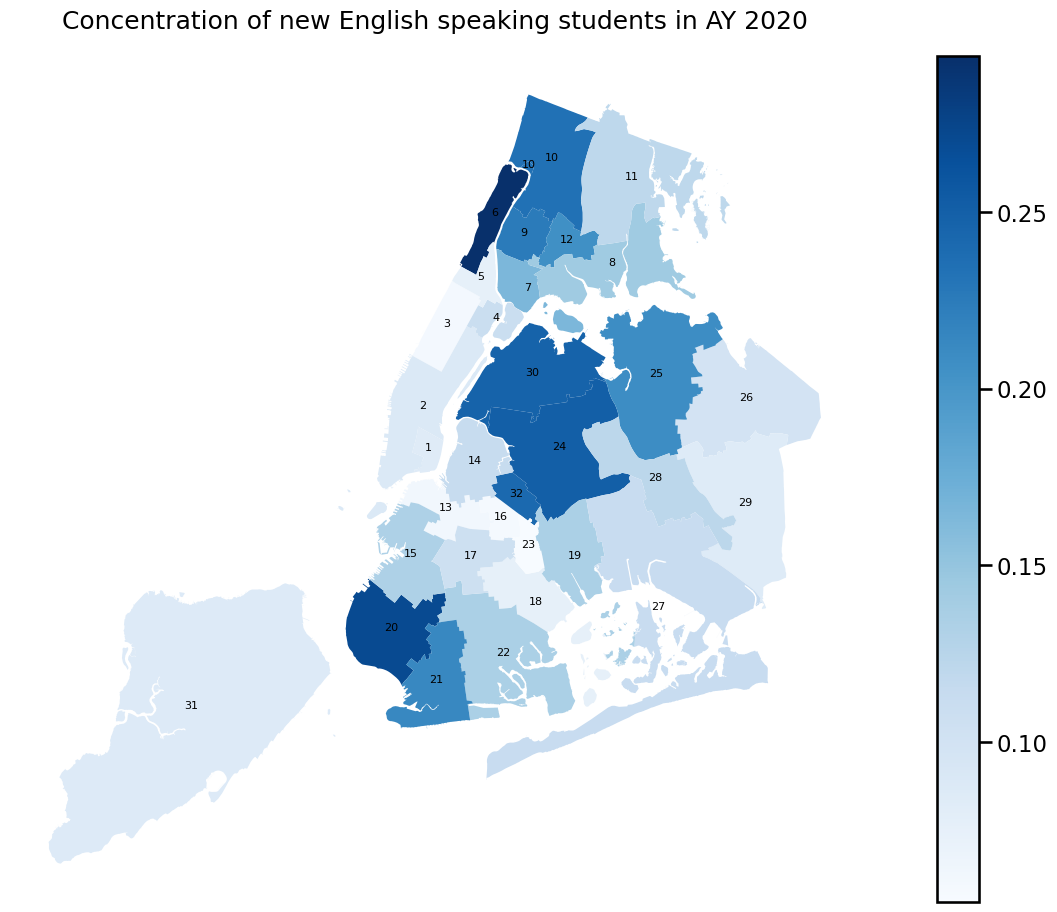

In [1]:
# make a district map with matplotlib
from nycschools import schools, geo, ui
import matplotlib.pyplot as plt
import seaborn as sns
# get the data we need using nycschools
districts = geo.load_districts()
df = schools.load_school_demographics()

# use only the most recent year in our data set
latest_ay = df.ay.max()
df = df[df.ay == latest_ay]


key_col = "ell_pct"
ell = df.groupby("district").agg({key_col: "mean"}).reset_index()
data = districts.merge(ell, on="district", how="inner")

fig, ax = plt.subplots(figsize=(16, 9))
sns.set_context('talk')

# don't show the boundary box or x/y ticks
plt.axis('off')
fig.tight_layout()
ax.set_title(f'Concentration of new English speaking students in AY {latest_ay}', pad=20)

# write the district numbers on the map at the center of the district shape
def label(row):
    xy = row.geometry.centroid.coords[0]
    ax.annotate(row.district, xy=xy, ha='center', fontsize=8)


data.apply(label, axis=1)

# plot districts, hide the axis labels, use the title "District % Poverty"
_ = data.plot(ax=ax, column=key_col, cmap="Blues", legend=True)

In [4]:
# get the data we need using nycschools
districts = geo.load_districts()
df = schools.load_school_demographics()
df.ay.unique()

array([2016, 2017, 2018, 2019, 2020])

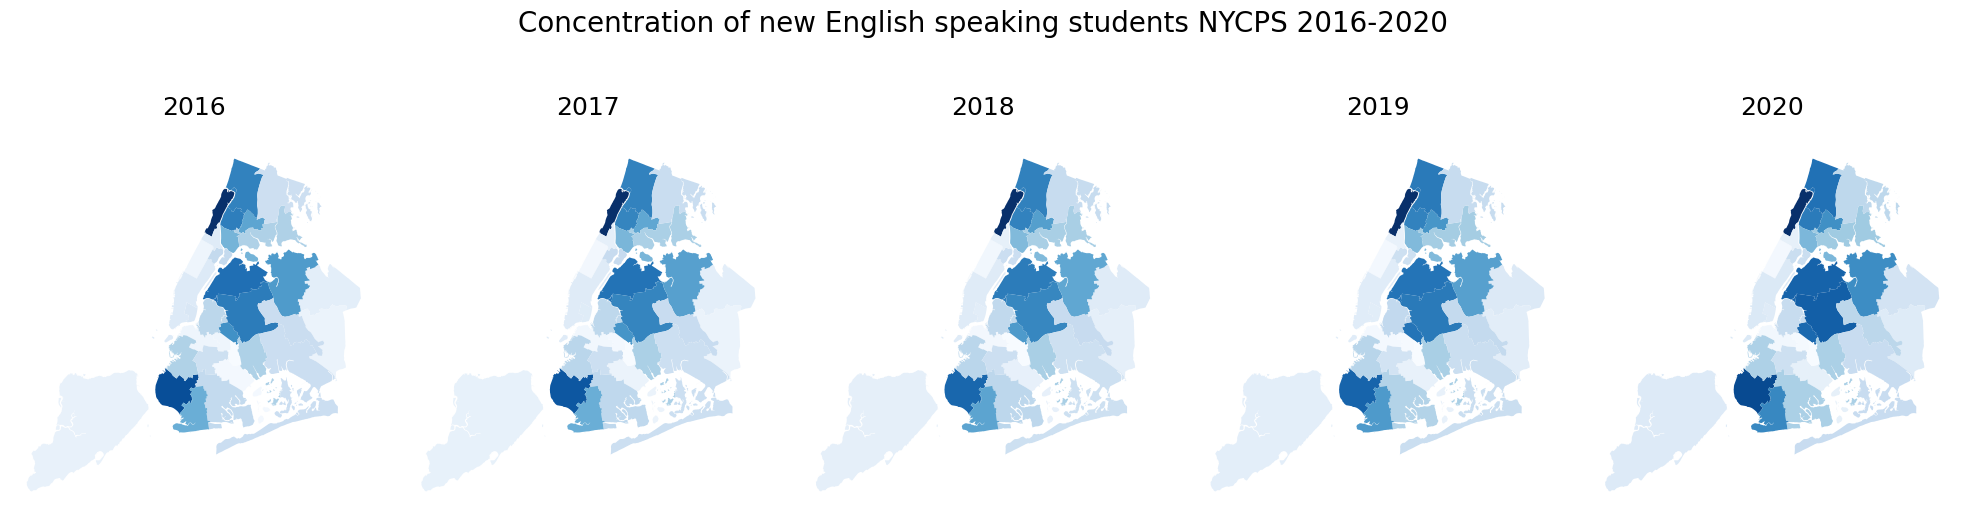

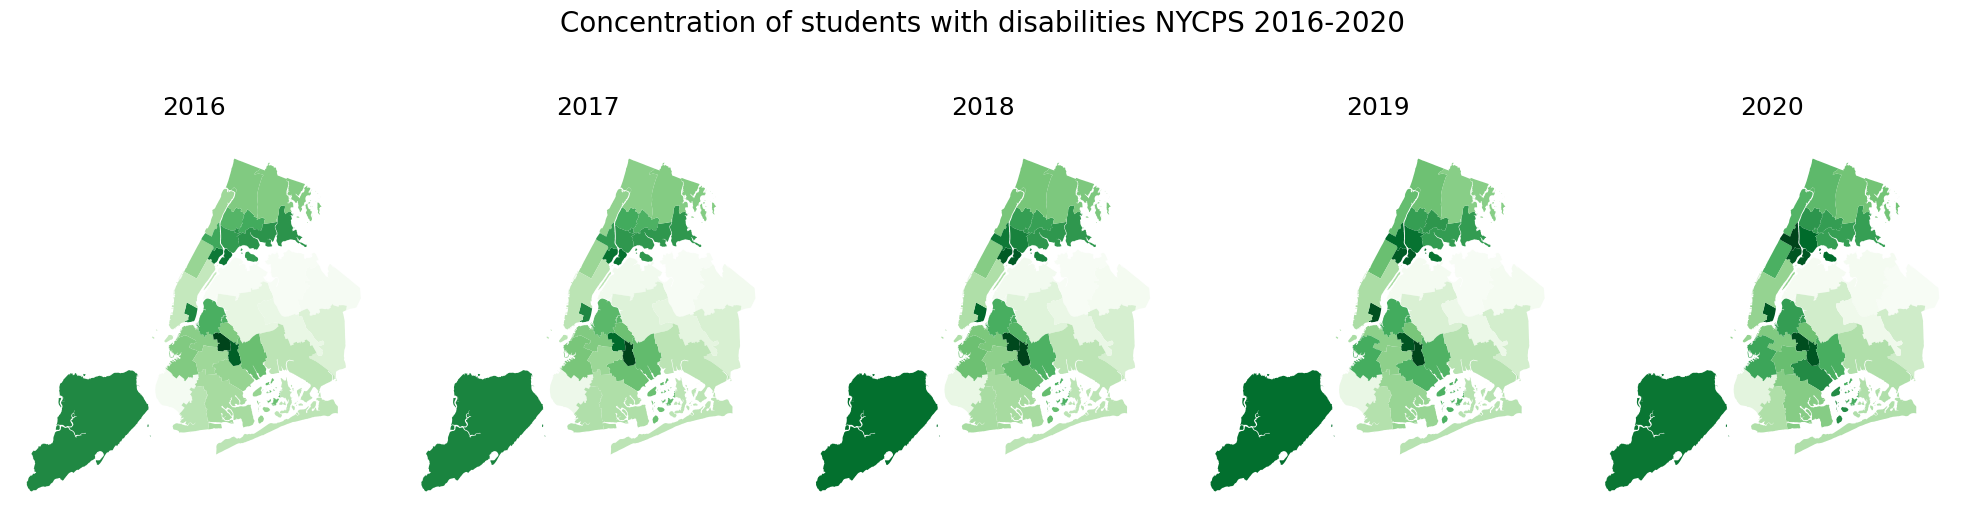

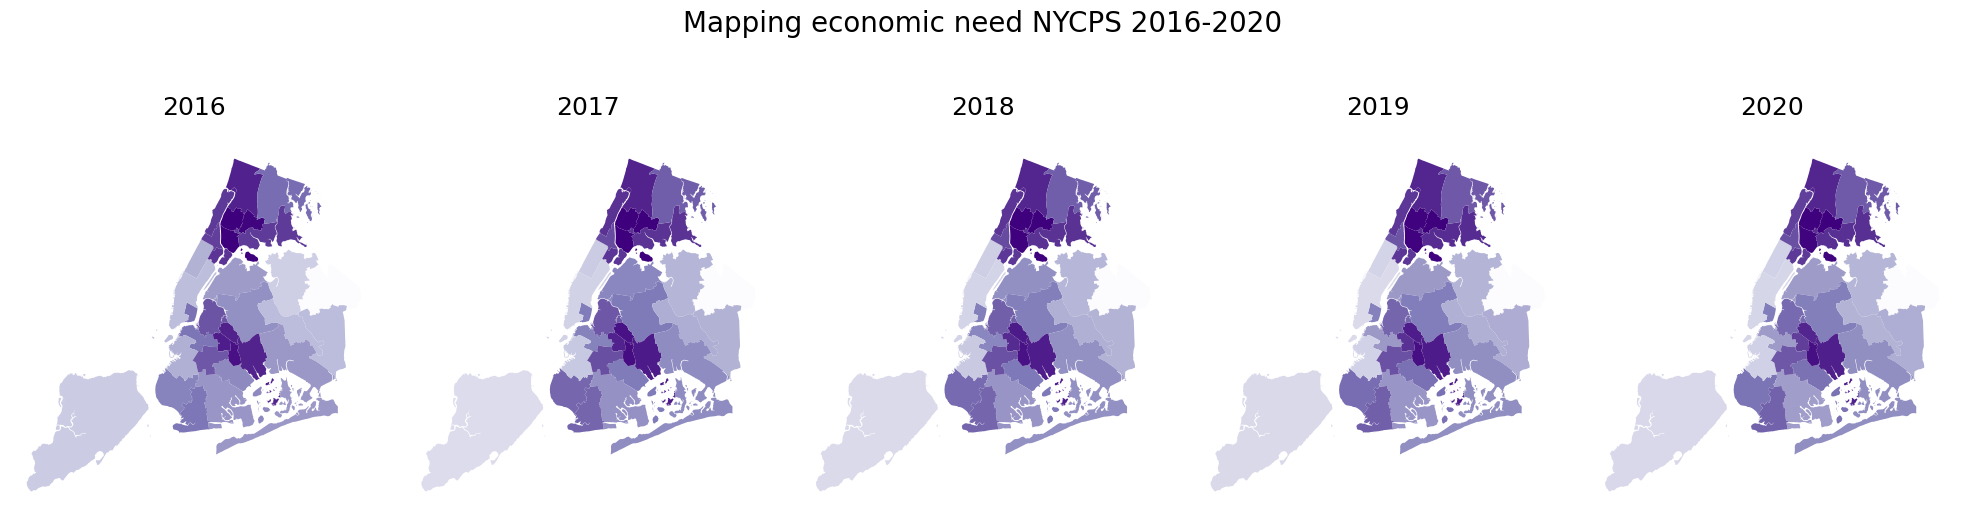

In [7]:

def plot_year(ax, data, key_col, title, cmap="Blues"):
    sns.set_context('talk')
    
    ax.set_title(title, pad=20)
    ax.axis('off')
    _ = data.plot(ax=ax, column=key_col, cmap=cmap, legend=False)


def plot_change(key_col, df, title, cmap):
    years = sorted(df.ay.unique())
    fig, axs = plt.subplots(1, len(years), figsize=(4*len(years), 6))
    for y, ax in zip(years, axs):
        mean_data = df[df.ay == y].groupby("district").agg({key_col: "mean"}).reset_index()
        data = districts.merge(mean_data, on="district", how="inner")
        plot_year(ax, data, key_col, str(y), cmap)


    fig.suptitle(f'{title} {years[0]}-{years[-1]}', fontsize=20)
    fig.tight_layout()
    plt.show()

plot_change("ell_pct", df, "Concentration of new English speaking students NYCPS", cmap="Blues")
plot_change("swd_pct", df, "Concentration of students with disabilities NYCPS", cmap="Greens")
plot_change("eni_pct", df, "Mapping economic need NYCPS", cmap="Purples")

In [31]:
# calculate aggregate data on districts
district_data = df.groupby("district").agg({"ell_pct": "mean", "swd_pct": "mean", "eni_pct": "mean", "total_enrollment":"sum"}).reset_index()
info = ["district", "total_enrollment", "ell_pct", "swd_pct", "eni_pct"]
# district_data["district info"] = data.apply(ui.popup(info), axis=1)

# district_data = districts.merge(district_data, on="district", how="inner")

# m = district_data.explore(tooltip="district", popup="district info", color="eni_pct", cmap="Greens")
# # ui.label_shapes(m, districts, "district", style={"color":"black", "font-size":"16px"})
# m
district_data["total_enrollment"]
district_data.sort_values("district")

,district,ell_pct,swd_pct,eni_pct,total_enrollment
0,1,0.084615,0.263459,0.722526,54408
1,2,0.085538,0.192901,0.552035,383052
2,3,0.061149,0.211991,0.567294,129405
3,4,0.112396,0.267611,0.826910,61348
4,5,0.076964,0.255217,0.795548,66446
5,6,0.305239,0.212839,0.824561,103532
6,7,0.168902,0.252293,0.912873,89637
7,8,0.140248,0.241270,0.833128,141479
8,9,0.227630,0.235457,0.914040,172829
9,10,0.230714,0.214411,0.855571,292542
